  # ***DATA MINING FINAL PROJECT***


> ##  ***Access to Clean Water and Sanitation on Child Health***
 >> ####   Our project examines the impact of access to clean water and sanitation on child health in Turkey, Chad, Bangladesh, the USA, and Canada. Focusing on the under-five mortality rate, we analyze disparities across countries with different economic levels.
>> #### The study highlights how clean water and proper sanitation reduce child mortality by preventing waterborne diseases. These findings underscore the importance of infrastructure in achieving the 6th Sustainable Development Goal: Clean Water and Sanitation.
>>
>> 
> ### **Şeyma Çakmakçı - 9A200048 | Beyza Sarı - 9A210016 | Büşra Akbaba- 9A200011**


          

>>

## ***Contents***

> ## ***1.*** ***Data Preprocessing***
>> #### **1) Understanding the Dataset**
>> #### **2) Data Cleaning**
>> #### **3) Encoding Categorical Variables**
>> #### **4) Scaling and Normalization**
>> #### **5) Summary of Steps**
> ## ***2.*** ***Data Visualization***
>> #### **1. Bar Chart**
>> #### **2. Scatter Plot**
>> #### **3. Heatmap**
> ## ***3.*** ***Linear Regression Model***
> ## ***4.*** ***Decision Tree Algorithm***
> ## ***4.*** ***KNN Model***

>    

> # ***Data Preprocessing***
>> #### Independent Variables (X): _Access to Clean Water (%),_Access to Sanitation (%)_
>> #### Dependent Variable (y): _Under-Five Death Class (Low, High, Very High)_

### _Step 1: Understanding the Dataset_

In [1250]:
import pandas as pd
import numpy as np

In [1251]:
df = pd.read_excel("dataset.xlsx", decimal=',')

In [1252]:
df.head()

,Country,Year,Access to clean water (%),Access to sanitation (%),Under-five deaths (numbers of death)
0,Türkiye,2018,99.20,70.580,16056
1,Türkiye,2019,99.40,72.704,14763
2,Türkiye,2020,99.50,74.880,13640
3,Türkiye,2021,99.60,76.767,12752
4,Türkiye,2022,99.72,78.685,12038


In [1253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               25 non-null     object 
 1   Year                                  25 non-null     int64  
 2   Access to clean water (%)             25 non-null     float64
 3   Access to sanitation (%)              25 non-null     float64
 4   Under-five deaths (numbers of death)  25 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ KB


In [1254]:
df.describe()

,Year,Access to clean water (%),Access to sanitation (%),Under-five deaths (numbers of death)
count,25.000000,25.000000,25.000000,25.000000
mean,2020.000000,72.072280,59.040120,41992.280000
std,1.443376,37.175141,34.096688,37106.845964
min,2018.000000,6.071000,10.240000,1848.000000
25%,2019.000000,58.180000,27.716000,12752.000000
50%,2020.000000,97.165000,74.880000,23851.000000
75%,2021.000000,99.039000,83.996000,77368.000000
max,2022.000000,99.720000,97.139000,100835.000000


### _Step 2: Data Cleaning_

In [1256]:
# Checked for missing values
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


Country                                 0
Year                                    0
Access to clean water (%)               0
Access to sanitation (%)                0
Under-five deaths (numbers of death)    0
dtype: int64

In [1257]:
# Checked for duplicates
print("\nNumber of duplicate entries:")
df.duplicated().sum()


Number of duplicate entries:


0

### _Step 3: Encoding Categorical Variables_

In [1259]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Country'], dtype=int)

df.head()

,Year,Access to clean water (%),Access to sanitation (%),Under-five deaths (numbers of death),Country_Bangladesh,Country_Canada,Country_Chad,Country_Türkiye,Country_United States
0,2018,99.20,70.580,16056,0,0,0,1,0
1,2019,99.40,72.704,14763,0,0,0,1,0
2,2020,99.50,74.880,13640,0,0,0,1,0
3,2021,99.60,76.767,12752,0,0,0,1,0
4,2022,99.72,78.685,12038,0,0,0,1,0


### _Step 4: Scaling and Normalization_

In [1261]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [1262]:
numeric_columns = ['Access to clean water (%)', 'Access to sanitation (%)', 'Under-five deaths (numbers of death)']                                                                   

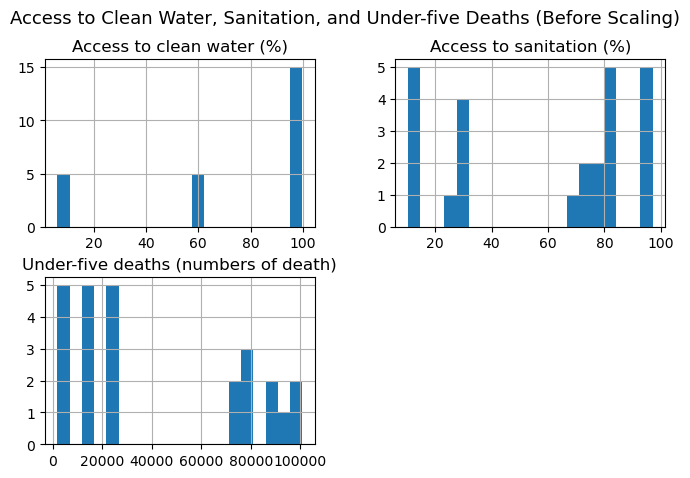

In [1263]:
df[numeric_columns].hist(bins=20, figsize=(8, 5))
plt.suptitle('Access to Clean Water, Sanitation, and Under-five Deaths (Before Scaling)', fontsize=13)
plt.show()

In [1264]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

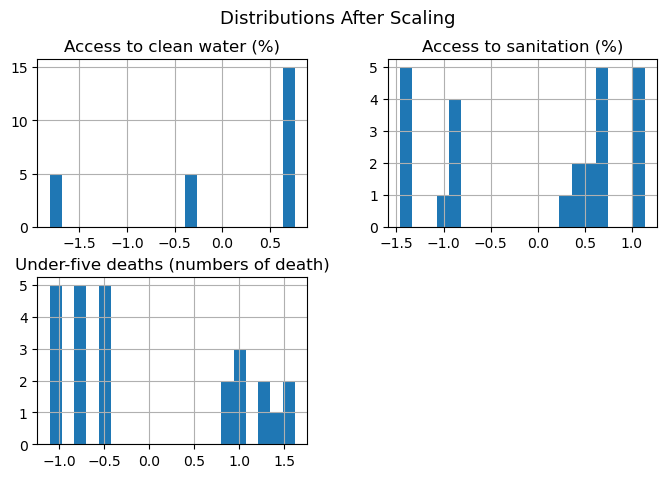

In [1265]:
df[numeric_columns].hist(bins=20, figsize=(8, 5))
plt.suptitle("Distributions After Scaling", fontsize=13)
plt.show()

In [1266]:
# Checking the results after scaling
df[['Access to clean water (%)', 'Access to sanitation (%)', 'Under-five deaths (numbers of death)']].head()

,Access to clean water (%),Access to sanitation (%),Under-five deaths (numbers of death)
0,0.744775,0.345425,-0.713375
1,0.750266,0.409003,-0.748939
2,0.753011,0.474137,-0.779827
3,0.755757,0.530621,-0.804251
4,0.759051,0.588033,-0.823890


In [1267]:
# Save the processed dataset
df.to_csv("processed_dataset.csv", index=False)

### _Summary of steps_

In [1269]:
print("\nSummary of steps:")
print("1. Loaded dataset and explored initial characteristics.")
print("   - We utilized df.head(), df.info(), and df.describe() to understand the structure and statistics of the data.")
print("2. Cleaned data: handled missing values and duplicates.")
print("   - We confirmed that there were no missing values and no duplicate entries.")
print("3. Encoded categorical variables.")
print("   - We used one-hot encoding to convert categorical data which is the country data for us into numerical data to make sure it is suitable for machine learning models.")
print("4. Scaled numeric features.")
print("   - We standardized the 'Access to clean water (%)' and 'Access to sanitation (%)' features.")
print("5. Documented our preprocessing steps.")


Summary of steps:
1. Loaded dataset and explored initial characteristics.
   - We utilized df.head(), df.info(), and df.describe() to understand the structure and statistics of the data.
2. Cleaned data: handled missing values and duplicates.
   - We confirmed that there were no missing values and no duplicate entries.
3. Encoded categorical variables.
   - We used one-hot encoding to convert categorical data which is the country data for us into numerical data to make sure it is suitable for machine learning models.
4. Scaled numeric features.
   - We standardized the 'Access to clean water (%)' and 'Access to sanitation (%)' features.
5. Documented our preprocessing steps.


> # ***Data Visualization***

In [1271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1272]:
df = pd.read_excel("dataset.xlsx")

## _1. Bar Chart_

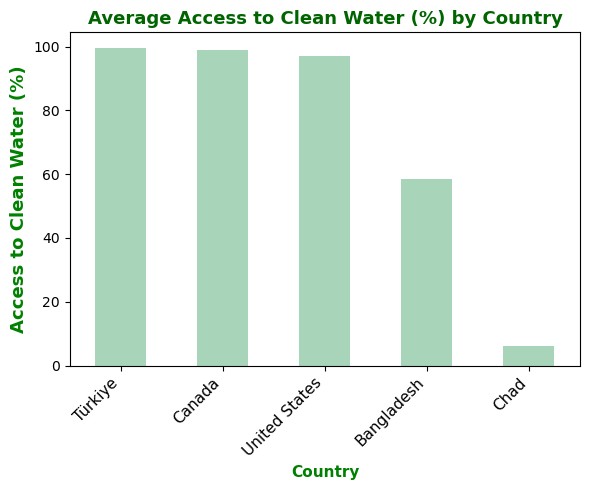

In [1274]:
# Bar chart for "Access to clean water (%)"
df_grouped = df.groupby('Country')['Access to clean water (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 5))

df_grouped.plot(kind='bar', color='#A8D5BA', linewidth=1.5)

# Title and label fonts
plt.title('Average Access to Clean Water (%) by Country', fontsize=13, fontweight='bold', color='darkgreen')
plt.xlabel('Country', fontsize=11, fontweight='bold', color='green')
plt.ylabel('Access to Clean Water (%)', fontsize=13, fontweight='bold', color='green')
plt.xticks(rotation=45, ha="right", fontsize=11, fontweight='light')
plt.tight_layout() 
plt.show()

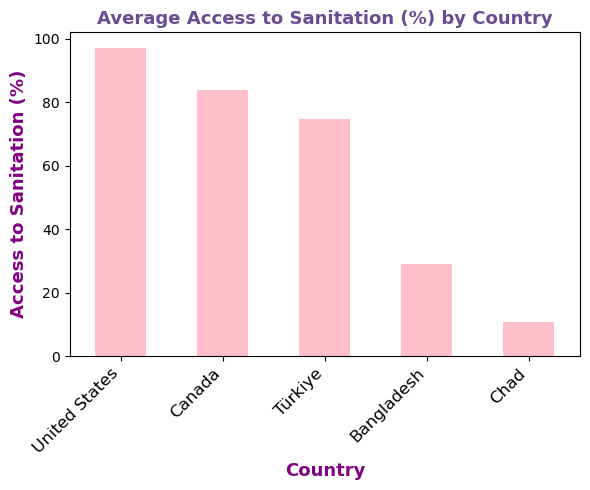

In [1275]:
# Bar chart for "Access to Sanitation (%)"
df_grouped_sanitation = df.groupby('Country')['Access to sanitation (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 5))
df_grouped_sanitation.plot(kind='bar', color='pink', linewidth=1.5)
plt.title('Average Access to Sanitation (%) by Country', fontsize=13, fontweight='bold', color='#6A4C93')
plt.xlabel('Country', fontsize=13, fontweight='bold', color='purple')
plt.ylabel('Access to Sanitation (%)', fontsize=13, fontweight='bold', color='purple')
plt.xticks(rotation=45, ha="right", fontsize=12, fontweight='light')
plt.tight_layout()
plt.show()

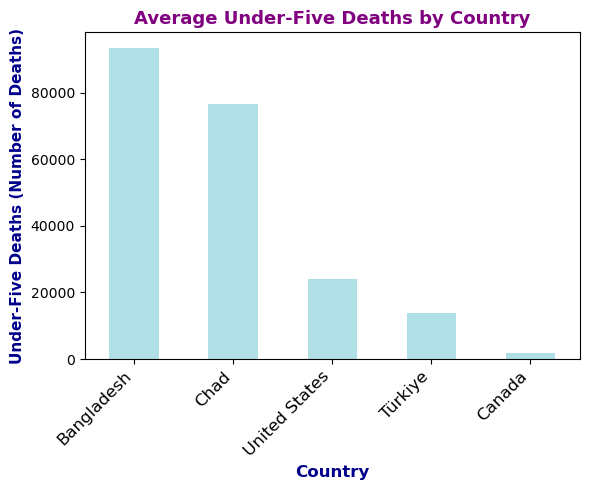

In [1276]:
# Bar chart for "Under-Five Deaths (numbers of death)"
df_grouped_mortality = df.groupby('Country')['Under-five deaths (numbers of death)'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 5))
df_grouped_mortality.plot(kind='bar', color='#B0E0E6', linewidth=1.5)
plt.title('Average Under-Five Deaths by Country', fontsize=13, fontweight='bold', color='purple')
plt.xlabel('Country', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Under-Five Deaths (Number of Deaths)', fontsize=11, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha="right", fontsize=12, fontweight='light')
plt.tight_layout()
plt.show()

## _2. Scatter Plot_

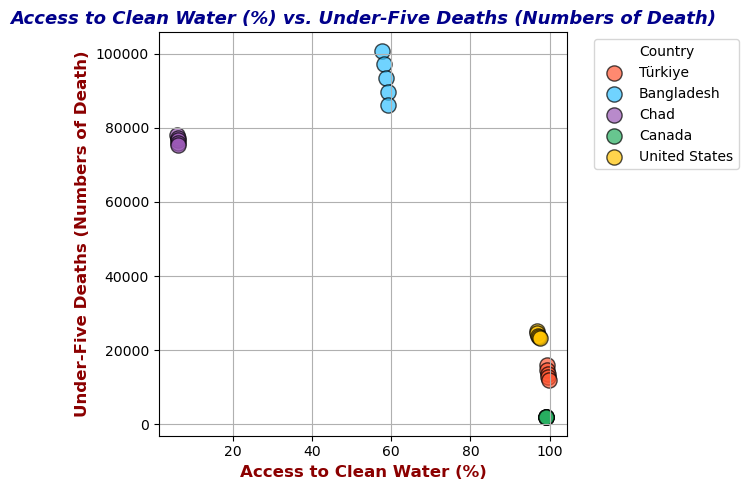

In [1278]:
plt.figure(figsize=(7, 5))

colors = ['#FF5733', '#33C1FF', '#9B59B6', '#27AE60', '#FFC300']
for i, country in enumerate(df['Country'].unique()):
    df_country = df[df['Country'] == country]
    plt.scatter(df_country['Access to clean water (%)'], df_country['Under-five deaths (numbers of death)'], 
                label=country, alpha=0.7, edgecolors='black', s=120, color=colors[i])

plt.title('Access to Clean Water (%) vs. Under-Five Deaths (Numbers of Death)', fontsize=13, fontweight='bold', style='italic', color='darkblue')
plt.xlabel('Access to Clean Water (%)', fontsize=12, fontweight='bold', color='darkred')
plt.ylabel('Under-Five Deaths (Numbers of Death)', fontsize=12, fontweight='bold', color='darkred')

plt.legend(title="Country", loc='upper left', bbox_to_anchor=(1.05, 1))

plt.grid(True)
plt.tight_layout()

plt.show()

## _3. Heatmap_

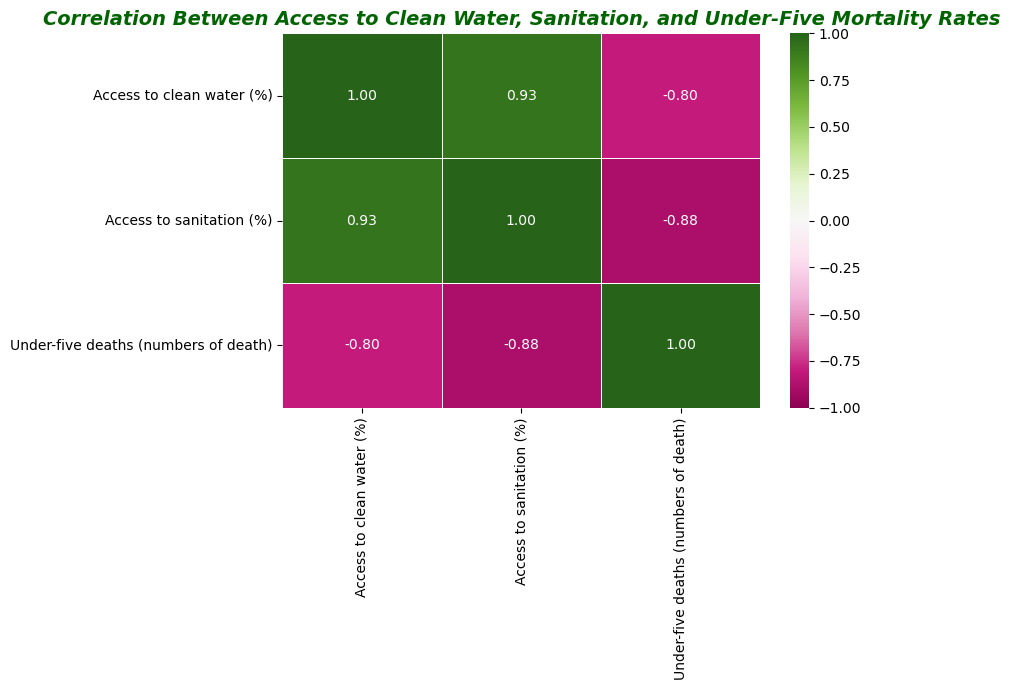

In [1280]:
# Calculating correlation: Access to water, sanitation, and death rates
correlation_matrix = df[['Access to clean water (%)', 'Access to sanitation (%)', 'Under-five deaths (numbers of death)']].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Between Access to Clean Water, Sanitation, and Under-Five Mortality Rates', fontsize=14, fontweight='bold', style='italic', color='darkgreen')
plt.tight_layout()

plt.show()

> # ***Linear Regression Model***

In [1282]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [1283]:
X = df[['Access to clean water (%)', 'Access to sanitation (%)']]
y = df['Under-five deaths (numbers of death)']

In [1284]:
X.shape, y.shape

((25, 2), (25,))

In [1285]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1286]:
X_train.shape, y_train.shape

((20, 2), (20,))

In [1287]:
X_test.shape, y_test.shape

((5, 2), (5,))

In [1288]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [1289]:
model = linear_model.LinearRegression()

In [1290]:
model.fit(X_train, y_train)

LinearRegression()

In [1291]:
y_pred = model.predict(X_test)

In [1292]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [  211.23956034 -1179.8064687 ]
Intercept: 96671.98003950024
Mean squared error (MSE): 273786047.47
Coefficient of determination (R^2): 0.78


In [1293]:
import seaborn as sns

In [1294]:
y_test

8     89743
16     1884
0     16056
23    23470
11    77368
Name: Under-five deaths (numbers of death), dtype: int64

In [1295]:
y_pred

array([73585.51117873, 18412.50406479, 34356.20386439,  2710.50812147,
       85663.80503568])

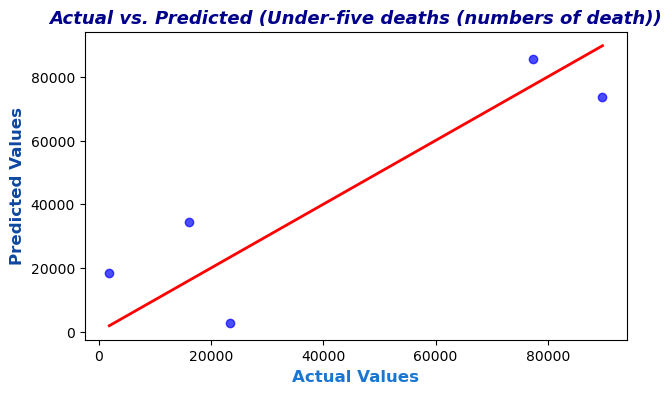

In [1296]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect prediction
plt.xlabel("Actual Values", fontsize=12, fontweight='bold', color='#1976D2')
plt.ylabel("Predicted Values", fontsize=12, fontweight='bold', color='#0D47A1')
plt.title("Actual vs. Predicted (Under-five deaths (numbers of death))", fontsize=13, fontweight='bold', style='italic', color='darkblue')
plt.show()

> # ***Decision Tree Model***

In [1298]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt

In [1299]:
df = pd.read_excel("dataset.xlsx", decimal=',')

In [1300]:
feature_cols = ['Access to clean water (%)', 'Access to sanitation (%)']
target_col = 'Under-five deaths (numbers of death)'

In [1301]:
quantiles = df[target_col].quantile([0.33, 0.66]).values

In [1302]:
df['Death Class'] = pd.cut(df[target_col], bins=[-float('inf'), quantiles[0], quantiles[1], float('inf')], 
                            labels=['High', 'Medium', 'Low'])


In [1303]:
X = df[feature_cols]
y = df['Death Class']

In [1304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1305]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [1306]:
y_pred = clf.predict(X_test)

In [1307]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [1308]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        High       0.50      1.00      0.67         1
         Low       1.00      1.00      1.00         2
      Medium       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.78         5
weighted avg       0.90      0.80      0.80         5


Confusion Matrix:
[[1 0 0]
 [0 2 0]
 [1 0 1]]


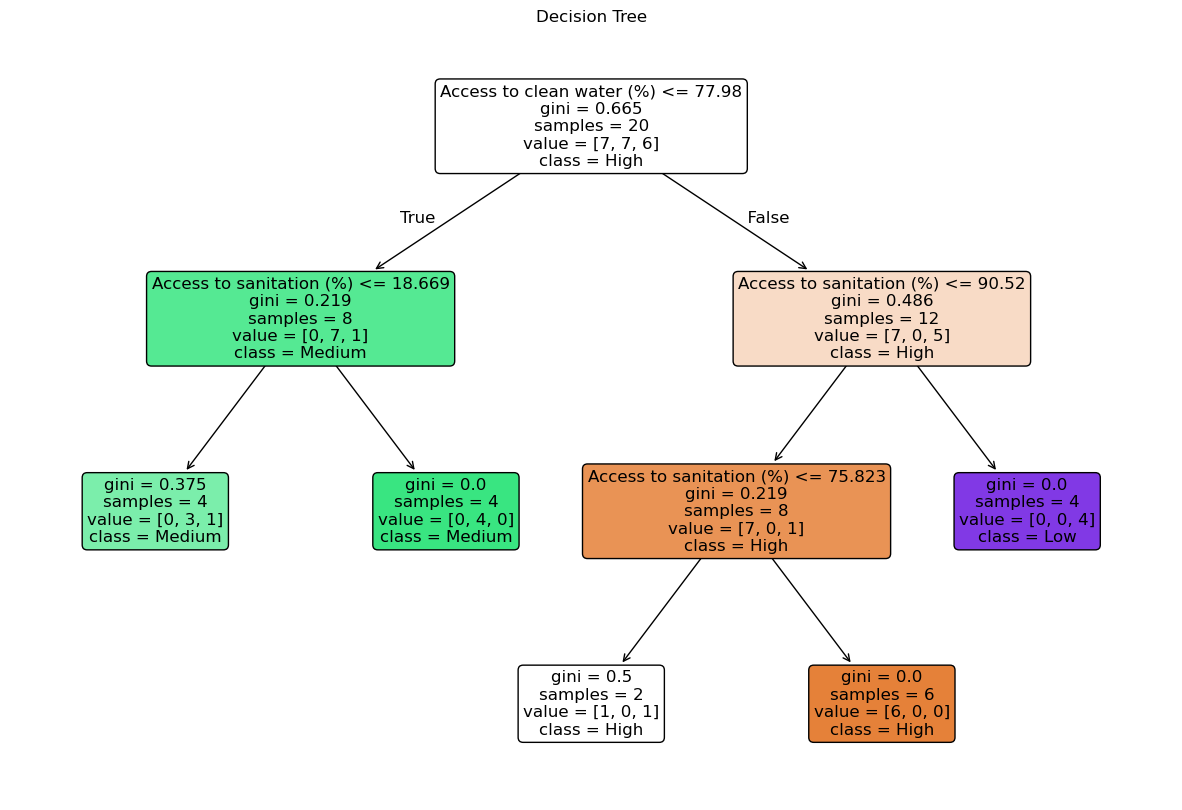

In [1309]:
plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=feature_cols,
    class_names=['High', 'Medium', 'Low'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree")
plt.savefig('decision_tree_optimized.png', dpi=300)
plt.show()

> # ***KNN Model***

In [1311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1312]:
df = pd.read_excel("dataset.xlsx", decimal=',')

In [1313]:
df.head()

,Country,Year,Access to clean water (%),Access to sanitation (%),Under-five deaths (numbers of death)
0,Türkiye,2018,99.20,70.580,16056
1,Türkiye,2019,99.40,72.704,14763
2,Türkiye,2020,99.50,74.880,13640
3,Türkiye,2021,99.60,76.767,12752
4,Türkiye,2022,99.72,78.685,12038


In [1314]:
print(df.describe())
print(df.columns) 

              Year  Access to clean water (%)  Access to sanitation (%)  \
count    25.000000                  25.000000                 25.000000   
mean   2020.000000                  72.072280                 59.040120   
std       1.443376                  37.175141                 34.096688   
min    2018.000000                   6.071000                 10.240000   
25%    2019.000000                  58.180000                 27.716000   
50%    2020.000000                  97.165000                 74.880000   
75%    2021.000000                  99.039000                 83.996000   
max    2022.000000                  99.720000                 97.139000   

       Under-five deaths (numbers of death)  
count                             25.000000  
mean                           41992.280000  
std                            37106.845964  
min                             1848.000000  
25%                            12752.000000  
50%                            23851.000000  
75

In [1315]:
df.isnull().sum()

Country                                 0
Year                                    0
Access to clean water (%)               0
Access to sanitation (%)                0
Under-five deaths (numbers of death)    0
dtype: int64

In [1316]:
df.shape

(25, 5)

In [1317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               25 non-null     object 
 1   Year                                  25 non-null     int64  
 2   Access to clean water (%)             25 non-null     float64
 3   Access to sanitation (%)              25 non-null     float64
 4   Under-five deaths (numbers of death)  25 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ KB


In [1318]:
X = df[["Access to clean water (%)", "Access to sanitation (%)"]]
y = df["Under-five deaths (numbers of death)"] 

In [1319]:
from sklearn.preprocessing import StandardScaler

In [1320]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1321]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Show the normalized features
print(X_scaled.head())

   Access to clean water (%)  Access to sanitation (%)
0                  -0.355196                 -0.841077
1                  -1.807235                 -1.441616
2                   0.750658                  0.403055
3                   0.689315                  1.130130
4                  -0.393292                 -0.976737


In [1322]:
from sklearn.model_selection import train_test_split

In [1323]:
q1 = df["Under-five deaths (numbers of death)"].quantile(0.25)
q3 = df["Under-five deaths (numbers of death)"].quantile(0.75)


In [1324]:
def classify_deaths(x):
    if x < q1:
        return "Low"
    elif x < q3:
        return "High"
    else:
        return "Very High"


In [1325]:
df["Death_Number"] = df["Under-five deaths (numbers of death)"].apply(classify_deaths)


In [1326]:
X = df[["Access to clean water (%)", "Access to sanitation (%)"]]
y = df["Death_Number"]

In [1327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(y.value_counts())

Death_Number
High         12
Very High     7
Low           6
Name: count, dtype: int64


In [1328]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (17, 2)
X_test shape: (8, 2)
y_train shape: (17,)
y_test shape: (8,)


In [1329]:
print(X_train[:5])

    Access to clean water (%)  Access to sanitation (%)
22                     97.165                    97.090
9                      59.109                    30.976
5                      57.721                    26.426
2                      99.500                    74.880
13                      6.205                    10.834


In [1330]:
from sklearn.neighbors import KNeighborsClassifier

In [1331]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [1332]:
y_pred = knn.predict(X_test)

In [1333]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1334]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      0.50      0.67         4
         Low       1.00      1.00      1.00         2
   Very High       0.50      1.00      0.67         2

    accuracy                           0.75         8
   macro avg       0.83      0.83      0.78         8
weighted avg       0.88      0.75      0.75         8



In [1335]:
confusion_mat = confusion_matrix(y_test, y_pred)

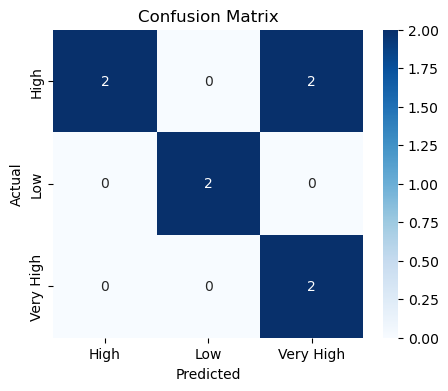

In [1336]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d",xticklabels=np.unique(y), yticklabels=np.unique(y), cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [1337]:
X_test_df = pd.DataFrame(X_test, columns=["Access to clean water (%)", "Access to sanitation (%)"])
X_test_df['Predicted Class'] = y_pred
X_test_df['True Class'] = y_test.values

In [1338]:
plt.figure(figsize=(12, 8))
palette = {'Low': 'red', 'High': 'blue', 'Very High': 'green'}

<Figure size 1200x800 with 0 Axes>

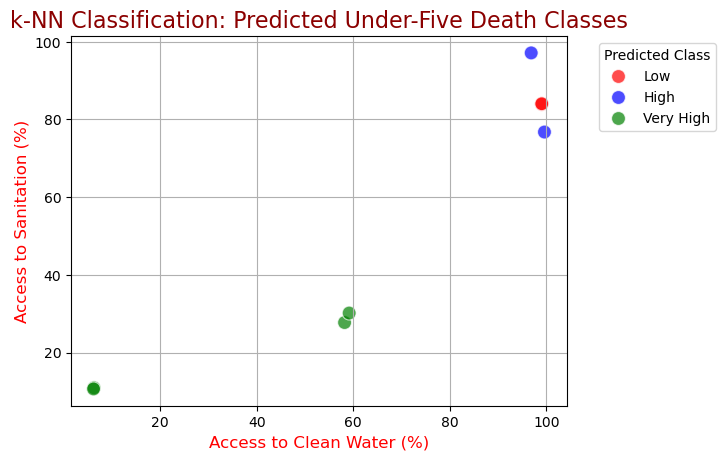

In [1339]:
sns.scatterplot(data=X_test_df,
                x="Access to clean water (%)",
                y="Access to sanitation (%)",
                hue="Predicted Class",
                palette=palette,
                s=100,
                alpha=0.7)

plt.title("k-NN Classification: Predicted Under-Five Death Classes", fontsize=16, color='darkred')
plt.xlabel("Access to Clean Water (%)", fontsize=12, color='red')
plt.ylabel("Access to Sanitation (%)", fontsize=12, color='red')
plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [1340]:
print(X_test_df['Predicted Class'].value_counts())

Predicted Class
Very High    4
Low          2
High         2
Name: count, dtype: int64


> # ***Final Report***
>> #### The study shows that access to clean water and adequate sanitation reduces child mortality by preventing waterborne diseases. While Turkey has made progress in infrastructure development as an OECD member, problems persist in rural areas.
>> #### In developing countries such as Chad and Bangladesh, water and sanitation deficiencies threaten child health. In developed G7 countries such as the United States and Canada, infrastructure is more robust.
>> 
>> #### These findings highlight the vital effects of clean water and sanitation on child health and the importance of investing in infrastructure to achieve the Sustainable Development Goals.

> # ***References***
>> ###  _UNICEF_
>> ###  _WHO_
>> ###  _T.C. Ministry of Environment_
>> ###  _Urbanization and Climate Change_